In [108]:
import pandas as pd
import pylab as plt
%matplotlib inline
import numpy as np
import math

df=pd.read_csv('data/train.csv', sep=',')

features = ['Fare_s','Age_with_Sex', 'Pclass_s','SibSp_s','Parch_s']
#features = ['Sex_', 'Age_s_e']

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=5, random_state=0)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(9,include_bias=False)

from sklearn.metrics import accuracy_score

In [109]:
def feature_engineering(df):
    df['Sex_'] = df['Sex'].apply(lambda x: -1 if x=='female' else 1)
    
    df['Fare'] = df['Fare'].fillna(10)
    fareMax=df['Fare'].max()
    fareMin=df['Fare'].min()

    df['Fare_s'] = (df['Fare']-fareMin)/(fareMax-fareMin)
    
    df['Pclass_s'] = df['Pclass']/3
    
    df['SibSp'] = df['SibSp'].apply(lambda x: 3 if x > 3 else x)
    df['SibSp_s'] = df['SibSp']/df['SibSp'].max()
    
    df['Parch'] = df['Parch'].apply(lambda x: 3 if x > 3 else x)
    df['Parch_s'] = df['Parch']/df['Parch'].max()

    df['HasAge'] = df['Age'].apply(lambda x: 0 if np.isnan(x) else 1)

    df['Age_'] = df['Age'].fillna(30)
    df['Age_'] = df['Age_'].apply(lambda x: 0 if x <= 16 else x)
    df['Age_'] = df['Age_'].apply(lambda x: 22 if x >12 and x <= 29 else x)
    df['Age_'] = df['Age_'].apply(lambda x: 40 if x >29 and x <= 46 else x)
    df['Age_'] = df['Age_'].apply(lambda x: 60 if x >46 else x)
    ageMax=df['Age_'].max()
    ageMin=df['Age_'].min()

    df['Age_s'] = (df['Age_']-ageMin)/(ageMax-ageMin)
    
    
    df['Age_with_Sex'] = df['Age_s'] + df['Sex_']

feature_engineering(df)

(array([  15.,    0.,    0.,    0.,    0.,    1.,    1.,    1.,   25.,
         198.,   69.,   21.,    6.,   30.,    6.,   12.,   48.,    5.,
          23.,   23.,   12.,    1.,    5.,    5.,    8.,    9.,   10.,
           4.,    5.,    4.,   10.,    5.,   45.,   17.,   15.,    2.,
           7.,   11.,   10.,   11.,    2.,    4.,    5.,    2.,    4.,
           2.,    2.,    0.,    5.,  185.]),
 array([  0. ,   0.8,   1.6,   2.4,   3.2,   4. ,   4.8,   5.6,   6.4,
          7.2,   8. ,   8.8,   9.6,  10.4,  11.2,  12. ,  12.8,  13.6,
         14.4,  15.2,  16. ,  16.8,  17.6,  18.4,  19.2,  20. ,  20.8,
         21.6,  22.4,  23.2,  24. ,  24.8,  25.6,  26.4,  27.2,  28. ,
         28.8,  29.6,  30.4,  31.2,  32. ,  32.8,  33.6,  34.4,  35.2,
         36. ,  36.8,  37.6,  38.4,  39.2,  40. ]),
 <a list of 50 Patch objects>)

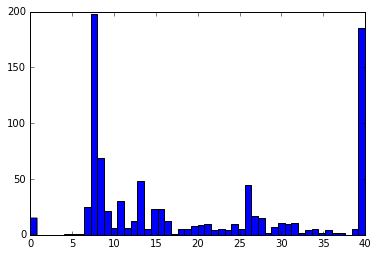

In [110]:
df['Fare'] = df['Fare'].apply(lambda x: 40 if x > 40 else x)

plt.hist(df[['Fare']].values, 50)

(array([ 678.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  118.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,   80.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,   15.]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
         0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
         0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
         0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
         0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ]),
 <a list of 50 Patch objects>)

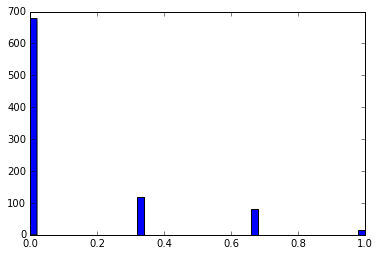

In [111]:
plt.hist(df[['Parch_s']].values, 50)

(array([ 608.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  209.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,   28.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,   46.]),
 array([ 0.  ,  0.06,  0.12,  0.18,  0.24,  0.3 ,  0.36,  0.42,  0.48,
         0.54,  0.6 ,  0.66,  0.72,  0.78,  0.84,  0.9 ,  0.96,  1.02,
         1.08,  1.14,  1.2 ,  1.26,  1.32,  1.38,  1.44,  1.5 ,  1.56,
         1.62,  1.68,  1.74,  1.8 ,  1.86,  1.92,  1.98,  2.04,  2.1 ,
         2.16,  2.22,  2.28,  2.34,  2.4 ,  2.46,  2.52,  2.58,  2.64,
         2.7 ,  2.76,  2.82,  2.88,  2.94,  3.  ]),
 <a list of 50 Patch objects>)

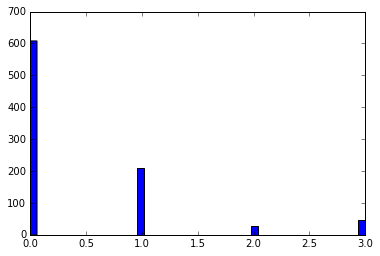

In [112]:
plt.hist(df[['SibSp']].values, 50)

(array([  49.,    0.,    0.,    0.,    0.,    0.,   98.,    0.,    0.,
           0.,    0.,  137.,    0.,    0.,    0.,    0.,   30.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,   51.,    0.,    0.,
           0.,    0.,    0.,  186.,    0.,    0.,    0.,    0.,  272.,
           0.,    0.,    0.,    0.,   68.]),
 array([-1.  , -0.94, -0.88, -0.82, -0.76, -0.7 , -0.64, -0.58, -0.52,
        -0.46, -0.4 , -0.34, -0.28, -0.22, -0.16, -0.1 , -0.04,  0.02,
         0.08,  0.14,  0.2 ,  0.26,  0.32,  0.38,  0.44,  0.5 ,  0.56,
         0.62,  0.68,  0.74,  0.8 ,  0.86,  0.92,  0.98,  1.04,  1.1 ,
         1.16,  1.22,  1.28,  1.34,  1.4 ,  1.46,  1.52,  1.58,  1.64,
         1.7 ,  1.76,  1.82,  1.88,  1.94,  2.  ]),
 <a list of 50 Patch objects>)

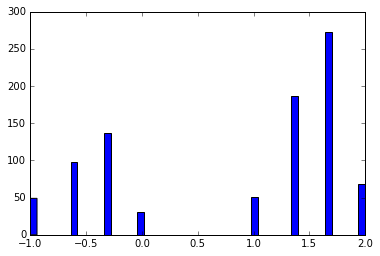

In [113]:
plt.hist(df[['Age_with_Sex']].values, 50)

In [114]:
str = 'Chronopoulos, Mr. Apostolos'

In [148]:
df['Title'] = df['Name'].apply(lambda x: x.replace('.',',').split(',')[1].strip())
uniq_title = np.unique(df['Title'])
print uniq_title

['Capt' 'Col' 'Don' 'Dr' 'Jonkheer' 'Lady' 'Major' 'Master' 'Miss' 'Mlle'
 'Mme' 'Mr' 'Mrs' 'Ms' 'Rev' 'Sir' 'the Countess']


In [149]:
title_mapping = {}

for t in uniq_title:
    x = df[df['Title'] == t]
    title_mapping[t] = 1 - x['Survived'].sum()/float(len(x['Survived']))

title_mapping

{'Capt': 1.0,
 'Col': 0.5,
 'Don': 1.0,
 'Dr': 0.5714285714285714,
 'Jonkheer': 1.0,
 'Lady': 0.0,
 'Major': 0.5,
 'Master': 0.42500000000000004,
 'Miss': 0.30219780219780223,
 'Mlle': 0.0,
 'Mme': 0.0,
 'Mr': 0.8433268858800773,
 'Mrs': 0.20799999999999996,
 'Ms': 0.0,
 'Rev': 1.0,
 'Sir': 0.0,
 'the Countess': 0.0}

In [150]:
df['Title_s'] = df['Title'].map(title_mapping)

In [152]:
df['Title_s']

0      0.843327
1      0.208000
2      0.302198
3      0.208000
4      0.843327
5      0.843327
6      0.843327
7      0.425000
8      0.208000
9      0.208000
10     0.302198
11     0.302198
12     0.843327
13     0.843327
14     0.302198
15     0.208000
16     0.425000
17     0.843327
18     0.208000
19     0.208000
20     0.843327
21     0.843327
22     0.302198
23     0.843327
24     0.302198
25     0.208000
26     0.843327
27     0.843327
28     0.302198
29     0.843327
         ...   
861    0.843327
862    0.208000
863    0.302198
864    0.843327
865    0.208000
866    0.302198
867    0.843327
868    0.843327
869    0.425000
870    0.843327
871    0.208000
872    0.843327
873    0.843327
874    0.208000
875    0.302198
876    0.843327
877    0.843327
878    0.843327
879    0.208000
880    0.208000
881    0.843327
882    0.302198
883    0.843327
884    0.843327
885    0.208000
886    1.000000
887    0.302198
888    0.302198
889    0.843327
890    0.843327
Name: Title_s, dtype: fl